In [121]:
!pip install --upgrade networkx[default]

In [122]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random
from datetime import datetime

In [123]:
# Se carga el database el cual está en formato csv
df = pd.read_csv('vehicle_gps.csv')

In [124]:
df

,vehicle,latitude,longitude,timestamp
0,A,-33.416709,-70.592693,01-01-2022 8:01
1,A,-33.417425,-70.592487,01-01-2022 8:02
2,A,-33.417831,-70.592367,01-01-2022 8:04
3,A,-33.417879,-70.592018,01-01-2022 8:05
4,A,-33.417818,-70.591653,01-01-2022 8:06
...,...,...,...,...
72,D,-33.419257,-70.586876,01-01-2022 8:22
73,D,-33.418902,-70.587003,01-01-2022 8:23
74,D,-33.418350,-70.587149,01-01-2022 8:23
75,D,-33.417943,-70.587252,01-01-2022 8:24


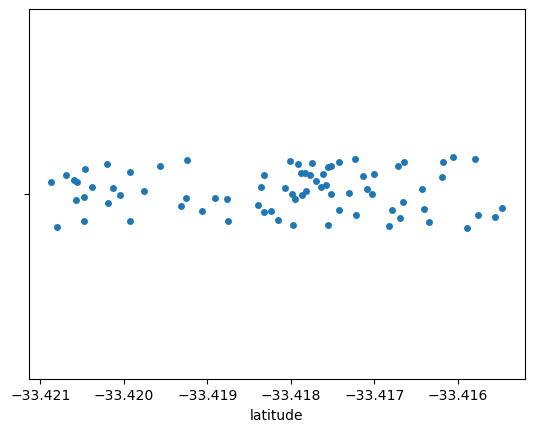

In [125]:
# Antes de realizar el gráfo, se revisa y pre procesa la base brevemente. Esto con el fin de revisar si esta contiene errores.
# Se revisan las latitudes del database
sn.stripplot(x='latitude', data=df) 
plt.show()

In [ ]:
"""En el gráfico anterior, no se ven presentes valores fuera de lo común, estos se encuentran todos dentro del mismo rango.
Por lo tanto, no se ven errores en el database."""

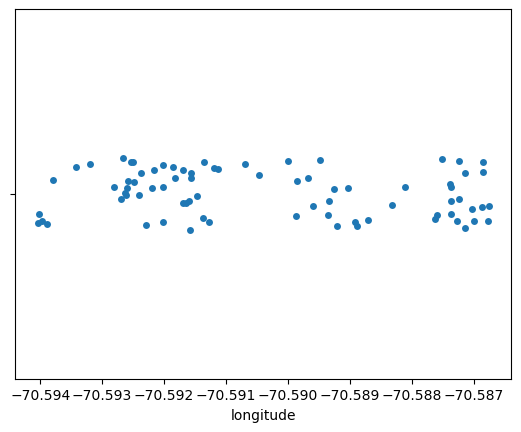

In [126]:
# Se revisan las longitudes del database
sn.stripplot(x='longitude', data=df) 
plt.show()

In [ ]:
"""En el gráfico anterior, no se ven presentes valores fuera de lo común, estos se encuentran todos dentro del mismo rango.
Por lo tanto, no se ven errores en el database."""

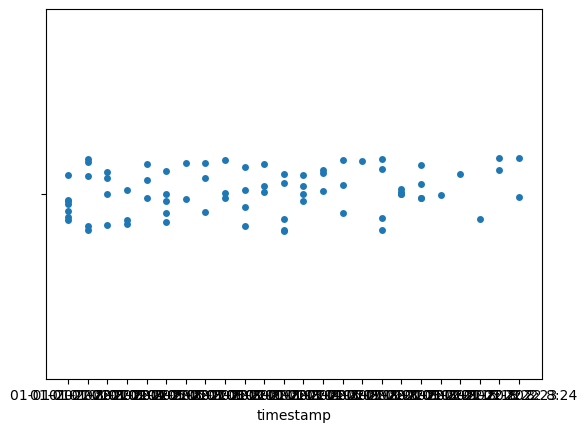

In [127]:
# Se revisan los timestamps del database
sn.stripplot(x='timestamp', data=df) 
plt.show()

In [ ]:
"""En el gráfico anterior, no se ven presentes valores fuera de lo común, estos se encuentran todos dentro del mismo rango.
Por lo tanto, no se ven errores en el database."""

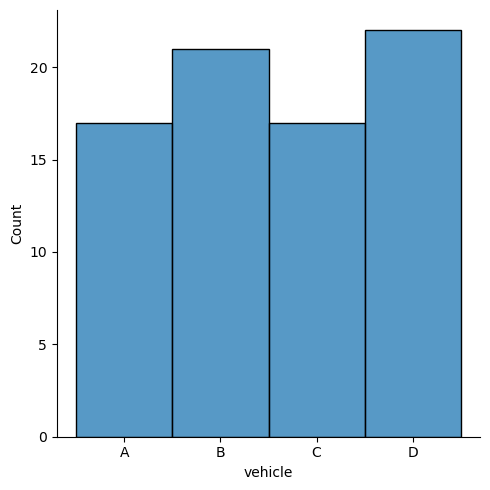

In [128]:
# Se revisan las cantidades de vehiculos y que no hayan datos mal ingresados dentro de estos.
sn.displot(x = 'vehicle', data=df)
plt.show()

In [129]:
# se revisa que no hayan valores nulos en el database
df.isnull().sum()

vehicle      0
latitude     0
longitude    0
timestamp    0
dtype: int64

In [130]:
# Combinar latitud y longitud en una columna de nodos
df['node'] = list(zip(df['latitude'], df['longitude']))

In [131]:
df['node']

0     (-33.416709, -70.592693)
1     (-33.417425, -70.592487)
2     (-33.417831, -70.592367)
3     (-33.417879, -70.592018)
4     (-33.417818, -70.591653)
                ...           
72    (-33.419257, -70.586876)
73    (-33.418902, -70.587003)
74     (-33.41835, -70.587149)
75    (-33.417943, -70.587252)
76     (-33.417515, -70.58738)
Name: node, Length: 77, dtype: object

In [132]:
# Crear un grafo vacío
G = nx.Graph()

In [133]:
# Iterar sobre los registros de ubicación
latitudes = []
longitudes = []
for latitud in df['latitude']:
    latitudes.append(latitud)
    
for longitud in df['longitude']:
    longitudes.append(longitud)

for latitud, longitud in zip(latitudes, longitudes):
    
    # Agregar un nodo para la ubicación
    ubicacion = (latitud, longitud)
    G.add_node(ubicacion)

In [134]:
# se crea una lista de vertices vacia
edges = []

# se crea un nodo base vacio
nodo_base = ""

for i in range(len(df['node'])):
    # si el nodo base esta vacio, se reeplaza con el nodo actual dentro del ciclo. Esto evita un error en la primera iteración
    if nodo_base == "":
        nodo_base = df['node'][i]
        
    else:
        # solo se agrega un vertice nuevo si el camino formado por 2 nodos es hecho por el mismo vehiculo.
        if df['vehicle'][i] == df['vehicle'][i-1]:
            G.add_edge(nodo_base, df['node'][i])
            nodo_base = df['node'][i]
            
        # en caso contrario, solo se reemplaza el nodo base
        else:
            nodo_base = df['node'][i]
            
# se imprimen los vertices para verificar
print (G.edges())

[((-33.416709, -70.592693), (-33.417425, -70.592487)), ((-33.417425, -70.592487), (-33.417831, -70.592367)), ((-33.417831, -70.592367), (-33.417879, -70.592018)), ((-33.417879, -70.592018), (-33.417818, -70.591653)), ((-33.417818, -70.591653), (-33.417763, -70.591365)), ((-33.417763, -70.591365), (-33.417742, -70.591373)), ((-33.417742, -70.591373), (-33.417691, -70.591139)), ((-33.417691, -70.591139), (-33.417616, -70.5907)), ((-33.417616, -70.5907), (-33.417424, -70.589862)), ((-33.417424, -70.589862), (-33.417304, -70.589254)), ((-33.417304, -70.589254), (-33.417633, -70.589041)), ((-33.417633, -70.589041), (-33.418065, -70.588922)), ((-33.418065, -70.588922), (-33.418147, -70.588326)), ((-33.418147, -70.588326), (-33.417972, -70.587517)), ((-33.417972, -70.587517), (-33.417907, -70.587275)), ((-33.417907, -70.587275), (-33.417523, -70.58739)), ((-33.416783, -70.59264), (-33.417088, -70.592805)), ((-33.417088, -70.592805), (-33.417216, -70.593424)), ((-33.417216, -70.593424), (-33.4

In [ ]:
"""
# DEJE ESTA VERSION DE LOS VERTICES PARA UNIR TODOS LOS NODOS SIN IMPORTAR QUE VEHICULO LO REALIZÓ O SI DEBERIAN IR CONECTADOS.
# ESTA VERSION NO ARROJA NINGÚN ERROR PERO LA CONCIDERO MENOS CORRECTA QUE LA HECHA ARRIBA.

# se crea una lista de vertices vacia
edges = []

# se crea un nodo base vacio
nodo_base = ""

for i in range(len(df['node'])):
    # si el nodo base esta vacio, se reeplaza con el nodo actual dentro del ciclo. Esto evita un error en la primera iteración
    if nodo_base == "":
        nodo_base = df['node'][i]
        
    else:
        G.add_edge(nodo_base, df['node'][i])
        nodo_base = df['node'][i]
            
# se imprimen los vertices para verificar
print (G.edges())"""

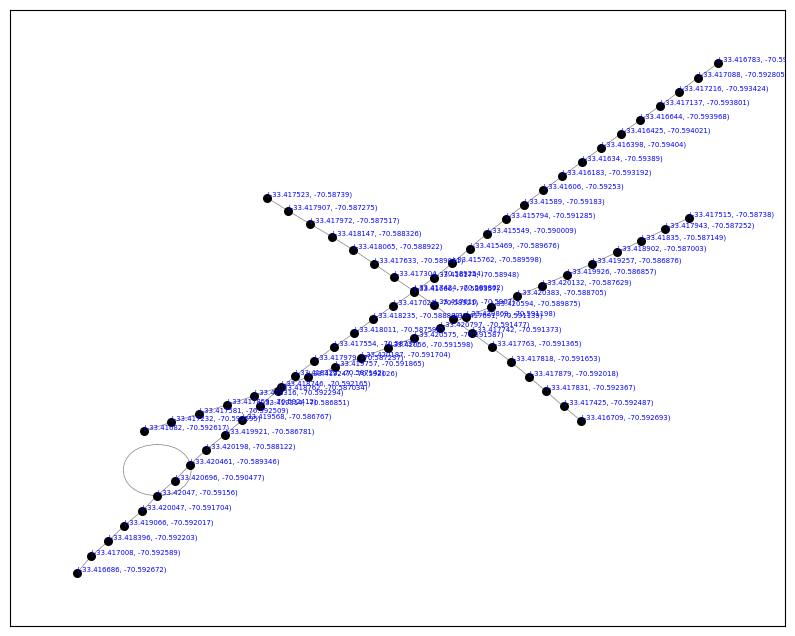

In [149]:
# tamaño del gráfo
plt.figure(figsize=(10,8))

# se define el pos
pos = nx.kamada_kawai_layout(G)

# se define las opciones de los nodos
node_options = {"node_color": "black", "node_size": 30}

# se define las opciones de las etiquetas de los nodos
node_label_options = {"font_size": 5,
                     "font_color": "blue",
                     "verticalalignment": "bottom",
                     "horizontalalignment": "left"}

# se define las opciones de los vertices
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# se dibujan las tres cosas juntas
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
nx.draw_networkx_labels(G, pos, **node_label_options)
plt.show()

In [246]:
def camino_mas_corto_y_tiempo(grafo):
    # Seleccionar nodos de origen y destino al azar
    nodos = list(grafo.nodes())
    nodo_origen = random.choice(nodos)
    nodo_destino = random.choice(nodos)
    
    # Verificar si hay una ruta entre los nodos de origen y destino
    if not nx.has_path(grafo, nodo_origen, nodo_destino):
        raise nx.NetworkXNoPath(f"No hay camino desde {nodo_origen} a {nodo_destino}.")
        
    # Utilizar el algoritmo de Dijkstra para encontrar el camino más corto
    camino_mas_corto = nx.dijkstra_path(grafo, nodo_origen, nodo_destino, weight='timestamp')

    # Calcular el tiempo total del camino como la suma de las diferencias de tiempo entre los nodos
    tiempo_total = 0
    for i in range(len(camino_mas_corto) - 1):
        nodo_actual = camino_mas_corto[i]
        nodo_siguiente = camino_mas_corto[i+1]
        
        # Se extraen los timestamps y se transforman de formato str a datetime
        tiempo_actual = datetime.strptime(df.loc[df['node'] == nodo_actual, 'timestamp'].values[0], "%d-%m-%Y %H:%M")
        tiempo_siguiente = datetime.strptime(df.loc[df['node'] == nodo_siguiente, 'timestamp'].values[0],"%d-%m-%Y %H:%M")
        
        tiempo_total += abs((tiempo_actual - tiempo_siguiente).total_seconds()) # Se utiliza total_seconds() para restar los tiempos en segundos
        
    tiempo_total = tiempo_total/60
    # Retornar el tiempo, los nodos de origen y destino, y el camino como resultados
    return tiempo_total, nodo_origen, nodo_destino, camino_mas_corto

In [251]:
# Se utiliza la funcion con el gráfo creado
tiempo, nodo_origen, nodo_destino, camino = camino_mas_corto_y_tiempo(G)

# Se imprimen los resultados obtenidos
print("Nodo de origen:", nodo_origen)
print("Nodo de destino:", nodo_destino)
print("Tiempo total:", tiempo, "minutos")
print("Camino:", camino)

Nodo de origen: (-33.418011, -70.587596)
Nodo de destino: (-33.416425, -70.594021)
Tiempo total: 18.0 minutos
Camino: [(-33.418011, -70.587596), (-33.418235, -70.588889), (-33.417023, -70.58921), (-33.41666, -70.589357), (-33.416174, -70.58948), (-33.415762, -70.589598), (-33.415469, -70.589676), (-33.415549, -70.590009), (-33.415794, -70.591285), (-33.41589, -70.59183), (-33.41606, -70.59253), (-33.416183, -70.593192), (-33.41634, -70.59389), (-33.416398, -70.59404), (-33.416425, -70.594021)]
